Report about usage statistics of UHH2 ntuples.

In [43]:
from __future__ import print_function

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['figure.figsize'] = (10, 6)

In [27]:
pd.options.display.max_colwidth = 200

In [37]:
df = pd.read_csv("datasetinfo_full.csv", index_col=0, low_memory=False)

# cast certain columns as Categorical type to save space/time
df['user'] = df['user'].astype('category')
df['xmldir'] = df['xmldir'].astype('category')
df['year'] = df['year'].astype('category')
df['isdata'] = df['ntuple'].str.contains('DATA_')

# Try and figure out which dataset file come from:
df['dataset'] = np.nan
# this is the recommended way to set values based on value of another column
df.loc[df['ntuple'].str.contains('_JetHT'), 'dataset'] = 'JetHT'
df.loc[df['ntuple'].str.contains('_SingleMu'), 'dataset'] = 'SingleMu'
df.loc[df['ntuple'].str.contains('_EGamma'), 'dataset'] = 'EGamma'
df.loc[df['ntuple'].str.contains('_MET'), 'dataset'] = 'MET'
df.loc[df['ntuple'].str.contains('_SingleElectron'), 'dataset'] = 'SingleElectron'
df['dataset'] = df['dataset'].astype('category')

In [39]:
df.head()

,ntuple,size,user,xmldir,year,isdata,dataset
0,/pnfs/desy.de/cms/tier2/store/user/drberry/SFrameNtuples/RunII_102X_v1/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_ext3-v2/190419...,514.199956,drberry,2018,2018,False,NaN
1,/pnfs/desy.de/cms/tier2/store/user/drberry/SFrameNtuples/RunII_102X_v1/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_ext3-v2/190419...,503.683629,drberry,2018,2018,False,NaN
2,/pnfs/desy.de/cms/tier2/store/user/drberry/SFrameNtuples/RunII_102X_v1/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_ext3-v2/190419...,554.392651,drberry,2018,2018,False,NaN
3,/pnfs/desy.de/cms/tier2/store/user/drberry/SFrameNtuples/RunII_102X_v1/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_ext3-v2/190419...,504.663676,drberry,2018,2018,False,NaN
4,/pnfs/desy.de/cms/tier2/store/user/drberry/SFrameNtuples/RunII_102X_v1/2018/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_ext3-v2/190419...,504.463241,drberry,2018,2018,False,NaN


In [40]:
df.dtypes

ntuple       object
size        float64
user       category
xmldir     category
year       category
isdata         bool
dataset    category
dtype: object

In [9]:
total_size_mb = df['size'].sum()
MB_TO_TB = 1024*1024.

## General stats

In [30]:
print(len(df.index), "files")

192704 files


In [10]:
print("Total size of all ntuples: %.3f TB" % (total_size_mb / MB_TO_TB))
# NB be careful - don't access with df.size as calls internal size!

Total size of all ntuples: 54.245 TB


In [11]:
print('Average space used per user: %.3f TB' % (total_size_mb / (MB_TO_TB * df['user'].nunique())))

Average space used per user: 6.027 TB


In [31]:
print("Statistics for ntuple filesizes:")
df['size'].describe()

Statistics for ntuple filesizes:


count    192704.000000
mean        295.168193
std         224.616019
min           0.371411
25%         191.663670
50%         245.849593
75%         375.118099
max        3808.237573
Name: size, dtype: float64

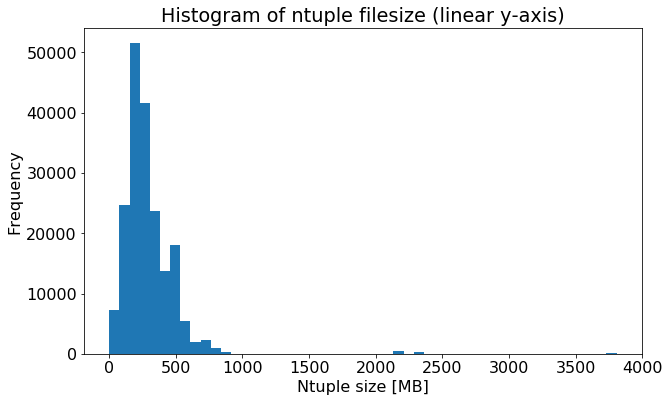

In [32]:
df['size'].plot(kind='hist', bins=50);
plt.xlabel('Ntuple size [MB]');
plt.title("Histogram of ntuple filesize (linear y-axis)");

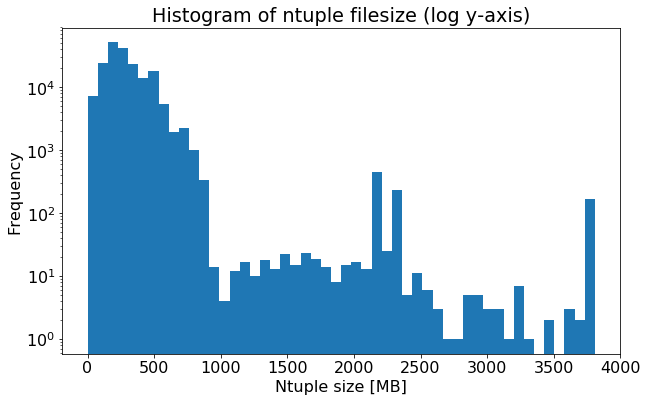

In [33]:
df['size'].plot(kind='hist', bins=50);
plt.xlabel('Ntuple size [MB]');
plt.yscale('log');
plt.title("Histogram of ntuple filesize (log y-axis)");

## Split by user

In [17]:
print("Total space usage per user [TB]:")
df.groupby('user')['size'].sum() / MB_TO_TB

Total space usage per user [TB]:


user
afroehli     0.744630
akaravdi    36.063894
deschwar     1.419155
drberry      4.684708
izoi         0.009950
karavdia     0.015602
raggleto     6.617528
rkogler      1.450326
tiroy        3.239288
Name: size, dtype: float64

In [18]:
print("% space usage by user:")
100 * df.groupby('user')['size'].sum() / total_size_mb

% space usage by user:


user
afroehli     1.372715
akaravdi    66.483251
deschwar     2.616191
drberry      8.636189
izoi         0.018343
karavdia     0.028763
raggleto    12.199315
rkogler      2.673655
tiroy        5.971579
Name: size, dtype: float64

In [15]:
print('# files per user:')
df.user.value_counts()

# files per user:


akaravdi    140502
drberry      17510
tiroy         9587
deschwar      8466
raggleto      8447
afroehli      5094
rkogler       2563
karavdia       497
izoi            38
Name: user, dtype: int64

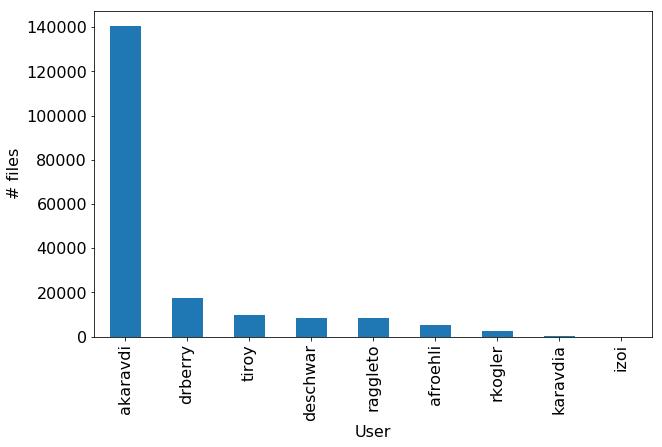

In [16]:
df.user.value_counts().plot(kind='bar');
plt.xlabel('User');
plt.ylabel('# files');

## Split by dataset year

In [20]:
print('Total space usage per dataset year [TB]:')
df.groupby('year')['size'].sum() / MB_TO_TB

Total space usage per dataset year [TB]:


year
2016v2     0.012143
2016v3    12.863170
2017       0.004494
2018      41.365276
Name: size, dtype: float64

In [21]:
print('% space usage per dataset year:')
100. * df.groupby('year')['size'].sum() / total_size_mb

% space usage per dataset year:


year
2016v2     0.022385
2016v3    23.713061
2017       0.008285
2018      76.256269
Name: size, dtype: float64

In [19]:
print("# files per dataset year:")
df['year'].value_counts()

# files per dataset year:


2018      165054
2016v3     27311
2017         198
2016v2       141
Name: year, dtype: int64

## Split by data/MC

In [22]:
print('Total space used per data/MC [TB]:')
df.groupby('isdata')['size'].sum() / MB_TO_TB

Total space used per data/MC [TB]:


isdata
False    38.349015
True     15.896068
Name: size, dtype: float64

In [23]:
print('Total space used per primary dataset [TB]:')
df[df['isdata']].groupby('dataset')['size'].sum() / MB_TO_TB

Total space used per primary dataset [TB]:


dataset
EGamma      4.789954
JetHT       8.654451
SingleMu    2.451663
Name: size, dtype: float64